In [1]:
%matplotlib inline
#importing necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("thanksgiving.csv", encoding="Latin-1")
print(data.head())

   RespondentID Do you celebrate Thanksgiving?  \
0    4337954960                            Yes   
1    4337951949                            Yes   
2    4337935621                            Yes   
3    4337933040                            Yes   
4    4337931983                            Yes   

  What is typically the main dish at your Thanksgiving dinner?  \
0                                             Turkey             
1                                             Turkey             
2                                             Turkey             
3                                             Turkey             
4                                           Tofurkey             

  What is typically the main dish at your Thanksgiving dinner? - Other (please specify)  \
0                                                NaN                                      
1                                                NaN                                      
2                            

In [2]:
#examining different columns in the dataset
data.columns

Index(['RespondentID', 'Do you celebrate Thanksgiving?',
       'What is typically the main dish at your Thanksgiving dinner?',
       'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       'How is the main dish typically cooked?',
       'How is the main dish typically cooked? - Other (please specify)',
       'What kind of stuffing/dressing do you typically have?',
       'What kind of stuffing/dressing do you typically have? - Other (please specify)',
       'What type of cranberry saucedo you typically have?',
       'What type of cranberry saucedo you typically have? - Other (please specify)',
       'Do you typically have gravy?',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
       'Which of these side dishes aretypically served

In [3]:
data["Do you celebrate Thanksgiving?"].value_counts()

Yes    980
No      78
Name: Do you celebrate Thanksgiving?, dtype: int64

Since we're trying to analyze data on Thanksgiving, we'll narrow down the dataset to respondents who celebrated Thanksgiving.

In [4]:
#Only keeping data on people who celebrate Thanksgiving.

data = data[data["Do you celebrate Thanksgiving?"] == "Yes"]
print(data["Do you celebrate Thanksgiving?"].value_counts())

Yes    980
Name: Do you celebrate Thanksgiving?, dtype: int64


In [5]:
#What dishes do people tend to eat during Thanksgiving?

data["What is typically the main dish at your Thanksgiving dinner?"].value_counts()

Turkey                    859
Other (please specify)     35
Ham/Pork                   29
Tofurkey                   20
Chicken                    12
Roast beef                 11
I don't know                5
Turducken                   3
Name: What is typically the main dish at your Thanksgiving dinner?, dtype: int64

Most of the respondents had turkey as their main dish. Some interesting dishes stand out, such as Tofurkey and Turducken. Since Tofurkey is a vegetarian dish, it would be interesting to see how many of the respondents who had Tofurkey as their main dish also had gravy in their meals.

In [6]:
Tofurkey = data["What is typically the main dish at your Thanksgiving dinner?"] == "Tofurkey"
data["Do you typically have gravy?"][Tofurkey].value_counts()

Yes    12
No      8
Name: Do you typically have gravy?, dtype: int64

12 out of 20 respondents had gravy with their tofurkey. With the assumption that most gravies are not vegetrian, this seemed like an unexpected finding at first. However, it is likely that individuals who have tofurkey would also have vegetarian gravies. Unfortunately the dataset does not differentiate different kinds of gravies respodnents had.

Next, we will see how many people ate Apple, Pecan or Pumpkin pie during their Thanksgiving dinner.

In [7]:
#getting serieses of boolean values from these columns
apple_isnull = pd.isnull(data["Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple"])
pumpkin_isnull = pd.isnull(data["Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin"])
pecan_isnull = pd.isnull(data["Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan"])
#combining the variables to create a single series
data["no_pies"] = apple_isnull & pumpkin_isnull & pecan_isnull
data["no_pies"].value_counts()

False    876
True     104
Name: no_pies, dtype: int64

We wanted to look at how many respondents had at least one of the three pies. 'False' indicates that the respondent had at least one kind of pie. 'True' indicates the opposite. This may seem counterintuitive, but it makes sense once we take a look at the code; by using 'pd.isnull', 'True' value indicates that the respondent did not have the pie. Vast majority of respondents had either an apple pie, a pumpkin pie or a pecan pie. 

We will now analyze the respondents' age groups.

In [8]:
data["Age"].value_counts()

45 - 59    269
60+        258
30 - 44    235
18 - 29    185
Name: Age, dtype: int64

Age is indicated by range and in strings. For our analysis, we will convert these ranges to the first age value and into integers.

count    947.000000
mean      40.089757
std       15.352014
min       18.000000
25%       30.000000
50%       45.000000
75%       60.000000
max       60.000000
Name: int_age, dtype: float64


([<matplotlib.axis.XTick at 0x1f9f9390860>,
 <a list of 4 Text xticklabel objects>)

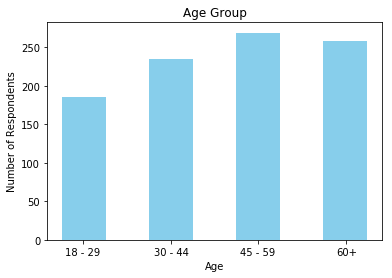

In [59]:
#Adding a new age column and describing its data

#function to convert string age range into a single integer value
def string_to_int(series):
    if pd.isnull(series):
        return None
    series = series.split(" ")[0] #first age in age-range identified
    series = series.replace("+", "") #getting rid of + in 60+
    return int(series) #value is an integer object

data["int_age"] = data["Age"].apply(string_to_int)
print(data["int_age"].describe())
fig, ax = plt.subplots()
ax = plt.hist(data['Age'].dropna(), 7, rwidth=1, color='skyblue')
#ax = data['Age'].value_counts().plot(kind='hist', title='Age Analysis', grid=False,
                    #figsize=(8,6))
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.title('Age Group')
plt.xticks([0.2, 1.075, 1.925, 2.8])

Average age of respondents is around 40 with the interquartile range falling in between 30 and 60. This closely resembles a normal distribution, but as we can see in the histogram, our methodology falls short on its accuracy. Since we have converted a broad age group to a single age, respondents have been grouped into a single age, which does not represent their real age.

count       829.000000
mean      75965.018094
std       59068.636748
min           0.000000
25%       25000.000000
50%       75000.000000
75%      100000.000000
max      200000.000000
Name: int_income, dtype: float64


Text(0.5,0,'Household Income ($)')

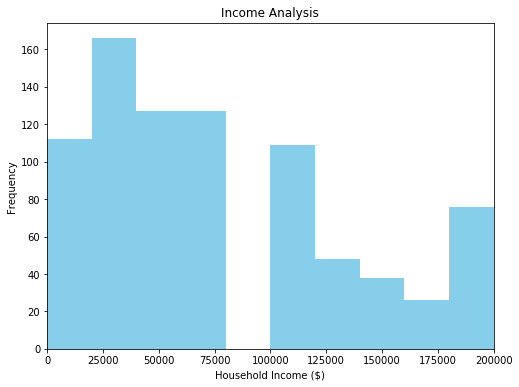

In [76]:
#Simple descriptive analysis of income distribution

def income_to_int(income):
    if pd.isnull(income) or "Prefer" in income:
        return None
    income = income.split(" ")[0]
    income = income.replace("$", "")
    income = income.replace(",", "")
    return int(income)
    
data["int_income"] = data["How much total combined money did all members of your HOUSEHOLD earn last year?"].apply(income_to_int)
print(data["int_income"].describe())
data['int_income'].plot(kind='hist', title='Income Analysis', grid=False, color='skyblue',
                       figsize=(8,6))
plt.xlim((0,200000))
plt.xlabel('Household Income ($)')

This analysis has similar pitfalls to the last one; income ranges were reduced to the lowest income value within each category. We can see that this series is not normally distributed. The mean and the median are close, suggesting that roughly 75,000 USD is the middle range of household income among respondents. It should be noted that a fair amount of respondents had household income that was 200,000 USD and up.

We will now take a look at how many people earning 150,000 USD and under traveled for Thanksgiving.

In [11]:
income_and_travel_bool = data["int_income"] <= 150000
income_and_travel = data["How far will you travel for Thanksgiving?"][income_and_travel_bool]
print(income_and_travel.value_counts())
low_income_travel_per = income_and_travel.value_counts().values / len(income_and_travel)
print(low_income_travel_per)

Thanksgiving is happening at my home--I won't travel at all                         298
Thanksgiving is local--it will take place in the town I live in                     212
Thanksgiving is out of town but not too far--it's a drive of a few hours or less    159
Thanksgiving is out of town and far away--I have to drive several hours or fly       58
Name: How far will you travel for Thanksgiving?, dtype: int64
[0.40990371 0.29160935 0.21870702 0.07977992]


In [12]:
#How far have people earning over 150,000 USD traveled for a Thanksgivin dinner?

high_income_and_travel_bool = data["int_income"] > 150000
high_income_and_travel = data["How far will you travel for Thanksgiving?"][high_income_and_travel_bool]
print(high_income_and_travel.value_counts())
high_income_travel_per = high_income_and_travel.value_counts().values / len(high_income_and_travel)
print(high_income_travel_per)

Thanksgiving is happening at my home--I won't travel at all                         49
Thanksgiving is local--it will take place in the town I live in                     25
Thanksgiving is out of town but not too far--it's a drive of a few hours or less    16
Thanksgiving is out of town and far away--I have to drive several hours or fly      12
Name: How far will you travel for Thanksgiving?, dtype: int64
[0.48039216 0.24509804 0.15686275 0.11764706]


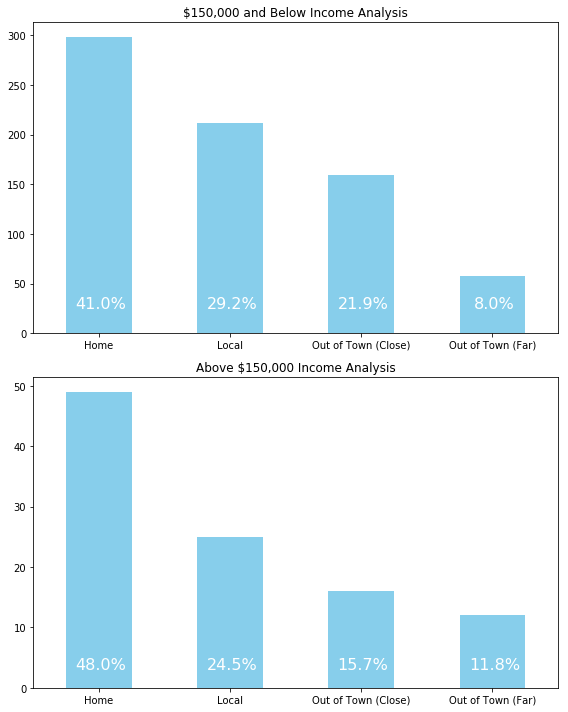

In [62]:
#bar graphs
plt.figure(figsize=(8,10))
income_labels = ['Home', 'Local', 'Out of Town (Close)', 
                     'Out of Town (Far)']

plt.subplot(211)
ax1 = income_and_travel.value_counts().plot(kind='bar', color='skyblue',
                                      title='$150,000 and Below Income Analysis')
ax1.set_xticklabels(income_labels,rotation='horizontal')
ax1.grid(False)
for index, percentage in enumerate(low_income_travel_per):
    percentage = str(round(percentage*100,1)) + "%"
    if index == 3:
        ax1.text(index-0.14, 25, percentage, color='white',
            fontsize=16)
    else:
        ax1.text(index-0.18, 25, percentage, color='white',
            fontsize=16)

plt.subplot(212)
ax2 = high_income_and_travel.value_counts().plot(kind='bar', color='skyblue',
                                      title='Above $150,000 Income Analysis')
ax2.set_xticklabels(income_labels,rotation='horizontal')
ax2.grid(False)
for index, percentage in enumerate(high_income_travel_per):
    percentage = str(round(percentage*100,1)) + "%"
    ax2.text(index-0.18, 3, percentage, color='white',
            fontsize=16)

plt.tight_layout()
plt.show()

Here we see that people from household income above 150,000 USD were more likely to have their Thanksgiving dinner at home or out of town far away compared to those who have household income of and below 150,000 USD. On the other hand, those with income equal to or below 150,000 USD are morelikely to celebrate Thanksgiving locally or out of town close to home.

Next, we will use a pivot table to show the average age of respondents for ever meeting their hometown friends on Thanksgiving night and having attended a "Friendsgiving" at least once in their lifetime.

Have you ever attended a "Friendsgiving?"                  No        Yes
Have you ever tried to meet up with hometown fr...                      
No                                                  42.283702  37.010526
Yes                                                 41.475410  33.976744


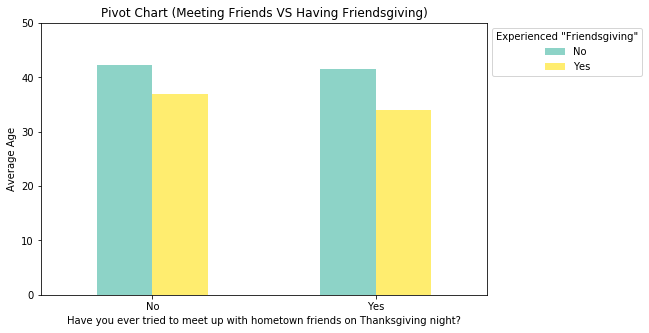

In [66]:
table = data.pivot_table( #forming a pivot table
    index="Have you ever tried to meet up with hometown friends on Thanksgiving night?",
    columns='Have you ever attended a "Friendsgiving?"',
    values="int_age")
print(table)

#plotting the pivot table
ax1 = table.plot(kind='bar', title='Pivot Chart (Meeting Friends VS Having Friendsgiving)',
                grid=False, rot=360, figsize=(8,5), ylim=(0,50), colormap='Set3')
ax1.set_ylabel('Average Age')
ax1.legend(title='Experienced "Friendsgiving"', loc='best', bbox_to_anchor=(1, 1))

The average age was the highest for those who neither experienced Friendsgiving nor have ever met their hometown friends on Thanksgiving night (42.3). For those who have met their hometown friends but have not experienced Friendsgiving had the average age of 41.5, compared to those who have not met their friends but have had Friendsgiving at 37. Lastly, the average age was the lowest at 34 for those who answered yes to both questions. 

Next, we'll create a pivot table to find the average income using the same two questions.

Have you ever attended a "Friendsgiving?"                     No           Yes
Have you ever tried to meet up with hometown fr...                            
No                                                  78914.549654  72894.736842
Yes                                                 78750.000000  66019.736842


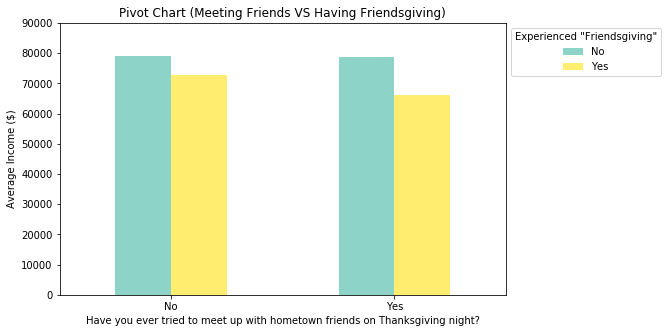

In [65]:
income_table = data.pivot_table(
    index="Have you ever tried to meet up with hometown friends on Thanksgiving night?",
    columns='Have you ever attended a "Friendsgiving?"',
    values="int_income")
print(income_table)

ax1 = income_table.plot(kind='bar', 
                        title='Pivot Chart (Meeting Friends VS Having Friendsgiving)', 
                        grid=False, rot=360, figsize=(8,5), colormap='Set3',
                       ylim=(0,90000))
ax1.set_ylabel('Average Income ($)')
ax1.legend(title='Experienced "Friendsgiving"', loc='best', bbox_to_anchor=(1, 1))

Pattern of the pivot chart is similar to the one above. Average income was the highest at 78,915 USD when respondents answered "no" to both questions. It decreased to 78,750 USD when they answered "yes" to having met hometown friends and to 72,895 USD when they answered "yes" to having experienced "Friendsgiving". Average income was at the lowest at 66,020 USD for respondents who answered "yes" to both questions. This pivot chart could have the same pattern with the previous one since older individuals are more likely to have higher income than younger individuals.

Let's take a look at the top 10 desserts.

In [16]:
dessert_columns_bool = data.columns.str.contains('dessert') #locating dessert columns
dessert_data = data[data.columns[dessert_columns_bool]] #creating a series
dessert_count = dessert_data.stack().value_counts()
print(dessert_count)

None                                                           295
Ice cream                                                      266
Cookies                                                        204
Cheesecake                                                     191
Other (please specify)                                         134
Brownies                                                       128
Apple cobbler                                                  110
Peach cobbler                                                  103
Carrot cake                                                     72
Fudge                                                           43
Blondies                                                        16
pie                                                             13
Pie                                                             12
pies                                                             6
Pumpkin pie                                                   

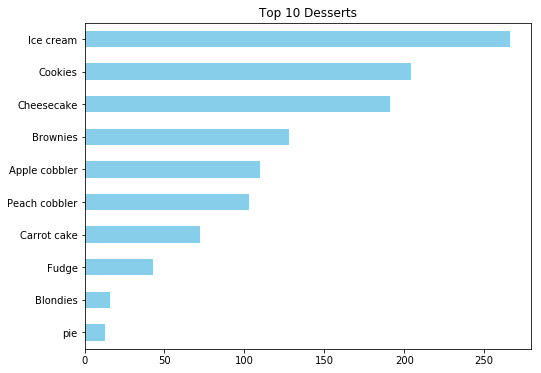

In [61]:
#creating a bar graph using value counts
dessert_count_dropped = dessert_count.drop(['None', 'Other (please specify)'])
dessert_count_dropped.head(10).sort_values(ascending=True).plot(kind='barh',
                                                       grid=False, color='skyblue',
                                                        figsize=(8,6),
                                                       title='Top 10 Desserts')

Of 1696 valid responses, 295 reported of not having a dessert. Otherwise, the list represents a typical list of desserts Americans would have at Thanksgiving.

Text(0.5,1,'Will you employer make you work on Black Friday?')

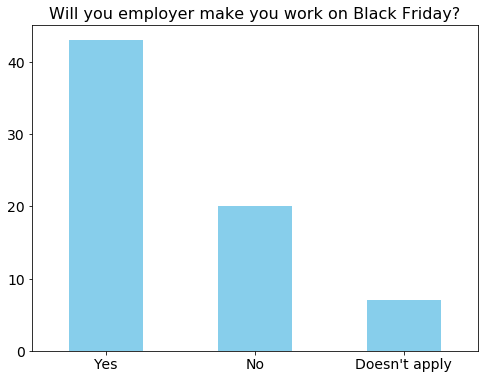

In [63]:
#How many people had to work on Black Friday?
work_data_columns = data.columns[data.columns.str.contains("Black Friday")][1] #identifying work columns
work_data = data[work_data_columns]
work_data.value_counts().plot(kind='bar',
                             grid=False, rot=360, color='skyblue',
                             figsize=(8,6), fontsize=14)
plt.title(work_data_columns, fontsize=16)

In [19]:
print(work_data.value_counts())

Yes              43
No               20
Doesn't apply     7
Name: Will you employer make you work on Black Friday?, dtype: int64


Among the people who responded that they celebrate Thanksgiving, 70 people provided with responses on if they work on Black Friday or not. 43 individuals said they were working on Black Friday, which was roughly 61%. 20 said they didn't have to work and 7 answered that the question didn't apply. It should be noted that a small amount of people responded to this question - 70 out of 980.

In [20]:
#Finding regional patters in the dinner menus.
regional_data = data['How would you describe where you live?']
print(regional_data.value_counts())
print(regional_data.value_counts(normalize=True))

Suburban    496
Urban       236
Rural       216
Name: How would you describe where you live?, dtype: int64
Suburban    0.523207
Urban       0.248945
Rural       0.227848
Name: How would you describe where you live?, dtype: float64


Here we can see that most of the respondents came from Suburban areas (52%), followed by Urban (25%) and Rural areas(23%).